Исправить ошибку в коде

for i in range(1000):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    W -= (alpha * (1/n * 2 * np.sum(X * (y_pred - y))))
    if i % 100 == 0:
        print(i, W, err)

In [ ]:
После анализа кода было понято следующее:
    Использую невекторные операции для вычисления весов, а сама переменная W является вектором значений весов,
    то необходимо проитерировать для каждого признака входящего в вектор. Но так как мы избавляемся от итераций
    по весам, то для корректного определения весов признаков необходимо перейти к векторным операциям.
    Поэтому необходимо отредактировать строчку №4 и записать вычисление вектора весов через векторные операции

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [111]:
np.random.seed(1234)

In [112]:
# Возьмем 2 признака и 1000 объектов
n_features = 2
n_objects = 1000

# сгенерируем вектор истинных весов
w_true = np.random.normal(size=(n_features, ))

# сгенерируем матрицу X, вычислим Y с добавлением случайного шума
X = np.random.uniform(-7, 7, (n_objects, n_features))
Y = X.dot(w_true) + np.random.normal(0, 0.5, size=(n_objects))

# возьмем нулевые начальные веса
w = np.zeros(n_features)
# возьмем постоянный шаг 
alpha = 0.02

w_list = []
errors = []
iter_num = 0

In [113]:
def calc_mse(w, X, y_pred):
    y = np.dot(X,w)
    return (sum((y - y_pred)**2)) / len(y)

In [114]:
for i in range(1000):
    #y = X.dot(w)
    err = calc_mse(w, X, Y)
    new_w = w - (alpha * 2 * np.dot(X.T, (np.dot(X,w) - Y)))/len(Y)
    if i % 100 == 0:
        print(i, w, err)
    w_list.append(new_w)
    errors.append(err)
    w = new_w
    iter_num += 1
w_list = np.array(w_list)

0 [0. 0.] 26.370797444846797
100 [ 0.46622325 -1.18317886] 0.2413403112113867
200 [ 0.46622325 -1.18317886] 0.2413403112113867
300 [ 0.46622325 -1.18317886] 0.2413403112113867
400 [ 0.46622325 -1.18317886] 0.2413403112113867
500 [ 0.46622325 -1.18317886] 0.2413403112113867
600 [ 0.46622325 -1.18317886] 0.2413403112113867
700 [ 0.46622325 -1.18317886] 0.2413403112113867
800 [ 0.46622325 -1.18317886] 0.2413403112113867
900 [ 0.46622325 -1.18317886] 0.2413403112113867


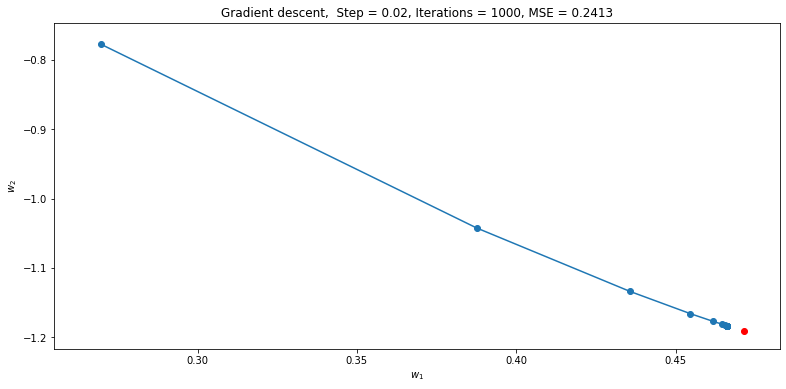

In [115]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале) 

plt.figure(figsize=(13, 6))
plt.title(f'Gradient descent,  Step = {alpha}, Iterations = {iter_num}, MSE = {round(errors[-1], 4)}')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list[:, 0], w_list[:, 1])
plt.scatter(w_true[0], w_true[1], c='r')
plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()